In [1]:
#Load Libraries
import json
import pandas as pd
from bs4 import BeautifulSoup
from urllib.request import urlopen

In [2]:
#Url
scrape_url = "https://understat.com/team/AC_Milan/2021"

In [3]:
#Connecting the url
page_connect = urlopen(scrape_url)

In [4]:
page_html = BeautifulSoup(page_connect,"html.parser") #If Connection error,execute again

In [5]:
page_html.findAll(name='script')

[<script>
 			var THEME = localStorage.getItem("theme") || 'DARK';
 			document.body.className = "theme-" + THEME.toLowerCase();
 		</script>,
 <script>
 	var datesData 	= JSON.parse('\x5B\x7B\x22id\x22\x3A\x2216765\x22,\x22isResult\x22\x3Atrue,\x22side\x22\x3A\x22a\x22,\x22h\x22\x3A\x7B\x22id\x22\x3A\x22102\x22,\x22title\x22\x3A\x22Sampdoria\x22,\x22short_title\x22\x3A\x22SAM\x22\x7D,\x22a\x22\x3A\x7B\x22id\x22\x3A\x22111\x22,\x22title\x22\x3A\x22AC\x20Milan\x22,\x22short_title\x22\x3A\x22MIL\x22\x7D,\x22goals\x22\x3A\x7B\x22h\x22\x3A\x220\x22,\x22a\x22\x3A\x221\x22\x7D,\x22xG\x22\x3A\x7B\x22h\x22\x3A\x221.24757\x22,\x22a\x22\x3A\x220.804449\x22\x7D,\x22datetime\x22\x3A\x222021\x2D08\x2D23\x2018\x3A45\x3A00\x22,\x22forecast\x22\x3A\x7B\x22w\x22\x3A0.46693573122173093192799342432408593595027923583984375,\x22d\x22\x3A0.293607870230256640109445243069785647094249725341796875,\x22l\x22\x3A0.23945639854142608538012382268789224326610565185546875\x7D,\x22result\x22\x3A\x22w\x22\x7D,\x7B\x22id

In [6]:
#Finding the desired script where data is stored.
page_html.findAll(name='script')[2]

<script>
	var statisticsData = JSON.parse('\x7B\x22situation\x22\x3A\x7B\x22OpenPlay\x22\x3A\x7B\x22shots\x22\x3A120,\x22goals\x22\x3A17,\x22xG\x22\x3A14.272164053283631801605224609375,\x22against\x22\x3A\x7B\x22shots\x22\x3A86,\x22goals\x22\x3A7,\x22xG\x22\x3A7.1619589454494416713714599609375\x7D\x7D,\x22FromCorner\x22\x3A\x7B\x22shots\x22\x3A15,\x22goals\x22\x3A3,\x22xG\x22\x3A2.311275775544345378875732421875,\x22against\x22\x3A\x7B\x22shots\x22\x3A30,\x22goals\x22\x3A1,\x22xG\x22\x3A2.9723885692656040191650390625\x7D\x7D,\x22SetPiece\x22\x3A\x7B\x22shots\x22\x3A13,\x22goals\x22\x3A0,\x22xG\x22\x3A1.19378364272415637969970703125,\x22against\x22\x3A\x7B\x22shots\x22\x3A6,\x22goals\x22\x3A0,\x22xG\x22\x3A0.4806001116521656513214111328125\x7D\x7D,\x22DirectFreekick\x22\x3A\x7B\x22shots\x22\x3A8,\x22goals\x22\x3A2,\x22xG\x22\x3A0.5082694254815578460693359375,\x22against\x22\x3A\x7B\x22shots\x22\x3A6,\x22goals\x22\x3A0,\x22xG\x22\x3A0.2802951149642467498779296875\x7D\x7D,\x22Penalty\x22\x

In [7]:
json_Raw_string = page_html.findAll(name='script')[2].string
json_Raw_string

"\n\tvar statisticsData = JSON.parse('\\x7B\\x22situation\\x22\\x3A\\x7B\\x22OpenPlay\\x22\\x3A\\x7B\\x22shots\\x22\\x3A120,\\x22goals\\x22\\x3A17,\\x22xG\\x22\\x3A14.272164053283631801605224609375,\\x22against\\x22\\x3A\\x7B\\x22shots\\x22\\x3A86,\\x22goals\\x22\\x3A7,\\x22xG\\x22\\x3A7.1619589454494416713714599609375\\x7D\\x7D,\\x22FromCorner\\x22\\x3A\\x7B\\x22shots\\x22\\x3A15,\\x22goals\\x22\\x3A3,\\x22xG\\x22\\x3A2.311275775544345378875732421875,\\x22against\\x22\\x3A\\x7B\\x22shots\\x22\\x3A30,\\x22goals\\x22\\x3A1,\\x22xG\\x22\\x3A2.9723885692656040191650390625\\x7D\\x7D,\\x22SetPiece\\x22\\x3A\\x7B\\x22shots\\x22\\x3A13,\\x22goals\\x22\\x3A0,\\x22xG\\x22\\x3A1.19378364272415637969970703125,\\x22against\\x22\\x3A\\x7B\\x22shots\\x22\\x3A6,\\x22goals\\x22\\x3A0,\\x22xG\\x22\\x3A0.4806001116521656513214111328125\\x7D\\x7D,\\x22DirectFreekick\\x22\\x3A\\x7B\\x22shots\\x22\\x3A8,\\x22goals\\x22\\x3A2,\\x22xG\\x22\\x3A0.5082694254815578460693359375,\\x22against\\x22\\x3A\\x7B\\x22sh

In [8]:
start_ind = json_Raw_string.index('\\')
stop_ind = json_Raw_string.index("')")

In [9]:
start_ind,stop_ind

(35, 8702)

In [10]:
json_data = json_Raw_string[start_ind:stop_ind]

In [11]:
json_data.encode("utf8")

b'\\x7B\\x22situation\\x22\\x3A\\x7B\\x22OpenPlay\\x22\\x3A\\x7B\\x22shots\\x22\\x3A120,\\x22goals\\x22\\x3A17,\\x22xG\\x22\\x3A14.272164053283631801605224609375,\\x22against\\x22\\x3A\\x7B\\x22shots\\x22\\x3A86,\\x22goals\\x22\\x3A7,\\x22xG\\x22\\x3A7.1619589454494416713714599609375\\x7D\\x7D,\\x22FromCorner\\x22\\x3A\\x7B\\x22shots\\x22\\x3A15,\\x22goals\\x22\\x3A3,\\x22xG\\x22\\x3A2.311275775544345378875732421875,\\x22against\\x22\\x3A\\x7B\\x22shots\\x22\\x3A30,\\x22goals\\x22\\x3A1,\\x22xG\\x22\\x3A2.9723885692656040191650390625\\x7D\\x7D,\\x22SetPiece\\x22\\x3A\\x7B\\x22shots\\x22\\x3A13,\\x22goals\\x22\\x3A0,\\x22xG\\x22\\x3A1.19378364272415637969970703125,\\x22against\\x22\\x3A\\x7B\\x22shots\\x22\\x3A6,\\x22goals\\x22\\x3A0,\\x22xG\\x22\\x3A0.4806001116521656513214111328125\\x7D\\x7D,\\x22DirectFreekick\\x22\\x3A\\x7B\\x22shots\\x22\\x3A8,\\x22goals\\x22\\x3A2,\\x22xG\\x22\\x3A0.5082694254815578460693359375,\\x22against\\x22\\x3A\\x7B\\x22shots\\x22\\x3A6,\\x22goals\\x22\\x3A0

In [12]:
json_data=json_data.encode("utf8").decode("unicode_escape")
json_data

'{"situation":{"OpenPlay":{"shots":120,"goals":17,"xG":14.272164053283631801605224609375,"against":{"shots":86,"goals":7,"xG":7.1619589454494416713714599609375}},"FromCorner":{"shots":15,"goals":3,"xG":2.311275775544345378875732421875,"against":{"shots":30,"goals":1,"xG":2.9723885692656040191650390625}},"SetPiece":{"shots":13,"goals":0,"xG":1.19378364272415637969970703125,"against":{"shots":6,"goals":0,"xG":0.4806001116521656513214111328125}},"DirectFreekick":{"shots":8,"goals":2,"xG":0.5082694254815578460693359375,"against":{"shots":6,"goals":0,"xG":0.2802951149642467498779296875}},"Penalty":{"shots":4,"goals":3,"xG":3.0451953411102294921875,"against":{"shots":2,"goals":2,"xG":1.52259767055511474609375}}},"formation":{"4-2-3-1":{"stat":"4-2-3-1","time":961,"shots":150,"goals":23,"xG":20.91005382873117923736572265625,"against":{"shots":111,"goals":9,"xG":11.330108868889510631561279296875}},"4-4-2":{"stat":"4-4-2","time":36,"shots":8,"goals":2,"xG":0.3328879289329051971435546875,"agains

In [13]:
json_load = json.loads(json_data)
json_load

{'situation': {'OpenPlay': {'shots': 120,
   'goals': 17,
   'xG': 14.272164053283632,
   'against': {'shots': 86, 'goals': 7, 'xG': 7.161958945449442}},
  'FromCorner': {'shots': 15,
   'goals': 3,
   'xG': 2.3112757755443454,
   'against': {'shots': 30, 'goals': 1, 'xG': 2.972388569265604}},
  'SetPiece': {'shots': 13,
   'goals': 0,
   'xG': 1.1937836427241564,
   'against': {'shots': 6, 'goals': 0, 'xG': 0.48060011165216565}},
  'DirectFreekick': {'shots': 8,
   'goals': 2,
   'xG': 0.5082694254815578,
   'against': {'shots': 6, 'goals': 0, 'xG': 0.28029511496424675}},
  'Penalty': {'shots': 4,
   'goals': 3,
   'xG': 3.0451953411102295,
   'against': {'shots': 2, 'goals': 2, 'xG': 1.5225976705551147}}},
 'formation': {'4-2-3-1': {'stat': '4-2-3-1',
   'time': 961,
   'shots': 150,
   'goals': 23,
   'xG': 20.91005382873118,
   'against': {'shots': 111, 'goals': 9, 'xG': 11.33010886888951}},
  '4-4-2': {'stat': '4-4-2',
   'time': 36,
   'shots': 8,
   'goals': 2,
   'xG': 0.332887

In [14]:
l1 = zip(json_load.keys(), json_load.values())

In [15]:
l2=list(l1)
l2

[('situation',
  {'OpenPlay': {'shots': 120,
    'goals': 17,
    'xG': 14.272164053283632,
    'against': {'shots': 86, 'goals': 7, 'xG': 7.161958945449442}},
   'FromCorner': {'shots': 15,
    'goals': 3,
    'xG': 2.3112757755443454,
    'against': {'shots': 30, 'goals': 1, 'xG': 2.972388569265604}},
   'SetPiece': {'shots': 13,
    'goals': 0,
    'xG': 1.1937836427241564,
    'against': {'shots': 6, 'goals': 0, 'xG': 0.48060011165216565}},
   'DirectFreekick': {'shots': 8,
    'goals': 2,
    'xG': 0.5082694254815578,
    'against': {'shots': 6, 'goals': 0, 'xG': 0.28029511496424675}},
   'Penalty': {'shots': 4,
    'goals': 3,
    'xG': 3.0451953411102295,
    'against': {'shots': 2, 'goals': 2, 'xG': 1.5225976705551147}}}),
 ('formation',
  {'4-2-3-1': {'stat': '4-2-3-1',
    'time': 961,
    'shots': 150,
    'goals': 23,
    'xG': 20.91005382873118,
    'against': {'shots': 111, 'goals': 9, 'xG': 11.33010886888951}},
   '4-4-2': {'stat': '4-4-2',
    'time': 36,
    'shots': 8

In [16]:
#Getting All situtaions key and value
Allsituations = l2[0][1]

In [17]:
Allsituations.keys()

dict_keys(['OpenPlay', 'FromCorner', 'SetPiece', 'DirectFreekick', 'Penalty'])

In [18]:
Situations = []
for i in Allsituations.keys():
    Situations.append(i)
Situations

['OpenPlay', 'FromCorner', 'SetPiece', 'DirectFreekick', 'Penalty']

In [19]:
Allsituations.values()

dict_values([{'shots': 120, 'goals': 17, 'xG': 14.272164053283632, 'against': {'shots': 86, 'goals': 7, 'xG': 7.161958945449442}}, {'shots': 15, 'goals': 3, 'xG': 2.3112757755443454, 'against': {'shots': 30, 'goals': 1, 'xG': 2.972388569265604}}, {'shots': 13, 'goals': 0, 'xG': 1.1937836427241564, 'against': {'shots': 6, 'goals': 0, 'xG': 0.48060011165216565}}, {'shots': 8, 'goals': 2, 'xG': 0.5082694254815578, 'against': {'shots': 6, 'goals': 0, 'xG': 0.28029511496424675}}, {'shots': 4, 'goals': 3, 'xG': 3.0451953411102295, 'against': {'shots': 2, 'goals': 2, 'xG': 1.5225976705551147}}])

In [20]:
#Storing Shots,goals,xG etc. in separate list to create dataframe
Shots=[]
Goals=[]
xG=[]
Shots_Against=[]
Goals_Against=[]
xG_Against=[]
for index in Allsituations.values():
    for key,val in index.items():
        if key=='shots':
            Shots.append(val)
        if key=='goals':
            Goals.append(val)
        if key=='xG':
            xG.append(val)
        if key=='against':
            for j,k in val.items():
                if j=='shots':
                    Shots_Against.append(k)
                if j=='goals':
                    Goals_Against.append(k)
                if j=='xG':
                    xG_Against.append(k)

In [21]:
#Making of dataframe
col_names = ['Situations','Shots Taken','Goals Scored','xG','Shots Against','Goals Against','xG Against']
df = pd.DataFrame([Situations,Shots,Goals,xG,Shots_Against,Goals_Against,xG_Against],index=col_names)
df = df.T

In [22]:
df

,Situations,Shots Taken,Goals Scored,xG,Shots Against,Goals Against,xG Against
0,OpenPlay,120,17,14.2722,86,7,7.16196
1,FromCorner,15,3,2.31128,30,1,2.97239
2,SetPiece,13,0,1.19378,6,0,0.4806
3,DirectFreekick,8,2,0.508269,6,0,0.280295
4,Penalty,4,3,3.0452,2,2,1.5226


In [23]:
#Converting the dtype to int or float as it was object earlier
Situations_df=df.apply(pd.to_numeric, errors="ignore")

In [24]:
Situations_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Situations     5 non-null      object 
 1   Shots Taken    5 non-null      int64  
 2   Goals Scored   5 non-null      int64  
 3   xG             5 non-null      float64
 4   Shots Against  5 non-null      int64  
 5   Goals Against  5 non-null      int64  
 6   xG Against     5 non-null      float64
dtypes: float64(2), int64(4), object(1)
memory usage: 408.0+ bytes


In [25]:
Situations_df

,Situations,Shots Taken,Goals Scored,xG,Shots Against,Goals Against,xG Against
0,OpenPlay,120,17,14.272164,86,7,7.161959
1,FromCorner,15,3,2.311276,30,1,2.972389
2,SetPiece,13,0,1.193784,6,0,0.480600
3,DirectFreekick,8,2,0.508269,6,0,0.280295
4,Penalty,4,3,3.045195,2,2,1.522598


In [26]:
#Getting the key and values of All the formations
AllFormation = l2[1][1]

In [27]:
AllFormation.keys()

dict_keys(['4-2-3-1', '4-4-2', '5-3-2', '4-3-3'])

In [28]:
Formations=[]
for form in AllFormation.keys():
    Formations.append(form)
Formations

['4-2-3-1', '4-4-2', '5-3-2', '4-3-3']

In [29]:
AllFormation

{'4-2-3-1': {'stat': '4-2-3-1',
  'time': 961,
  'shots': 150,
  'goals': 23,
  'xG': 20.91005382873118,
  'against': {'shots': 111, 'goals': 9, 'xG': 11.33010886888951}},
 '4-4-2': {'stat': '4-4-2',
  'time': 36,
  'shots': 8,
  'goals': 2,
  'xG': 0.3328879289329052,
  'against': {'shots': 5, 'goals': 0, 'xG': 0.24199570063501596}},
 '5-3-2': {'stat': '5-3-2',
  'time': 23,
  'shots': 1,
  'goals': 0,
  'xG': 0.06861367076635361,
  'against': {'shots': 12, 'goals': 1, 'xG': 0.7558500934392214}},
 '4-3-3': {'stat': '4-3-3',
  'time': 13,
  'shots': 1,
  'goals': 0,
  'xG': 0.019132809713482857,
  'against': {'shots': 2, 'goals': 0, 'xG': 0.08988574892282486}}}

In [30]:
Time = []
Formation_Shots=[]
Formation_Goals=[]
Formation_xG=[]
Formation_Shots_Against=[]
Formation_Goals_Against=[]
Formation_xG_Against=[]
for index in AllFormation.values():
    for key,val in index.items():
        if key=='time':
            Time.append(val)
        if key=='shots':
            Formation_Shots.append(val)
        if key=='goals':
            Formation_Goals.append(val)
        if key=='xG':
            Formation_xG.append(val)
        if key=='against':
            for j,k in val.items():
                if j=='shots':
                    Formation_Shots_Against.append(k)
                if j=='goals':
                    Formation_Goals_Against.append(k)
                if j=='xG':
                    Formation_xG_Against.append(k)

In [31]:
col_names = ['Formations','Minutes played on this Formation','Shots Taken','Goals Scored','xG','Shots Against','Goals Against','xG Against']
df_formations = pd.DataFrame([Formations,Time,Formation_Shots,Formation_Goals,Formation_xG,Formation_Shots_Against,Formation_Goals_Against,Formation_xG_Against],index=col_names)
df_formations = df_formations.T

In [32]:
Formations_df=df_formations.apply(pd.to_numeric, errors="ignore")

In [33]:
Formations_df

,Formations,Minutes played on this Formation,Shots Taken,Goals Scored,xG,Shots Against,Goals Against,xG Against
0,4-2-3-1,961,150,23,20.910054,111,9,11.330109
1,4-4-2,36,8,2,0.332888,5,0,0.241996
2,5-3-2,23,1,0,0.068614,12,1,0.755850
3,4-3-3,13,1,0,0.019133,2,0,0.089886


In [34]:
Timings = l2[3][1]

In [35]:
Timings.keys()

dict_keys(['1-15', '16-30', '31-45', '46-60', '61-75', '76+'])

In [36]:
Timings_period=[]
for tim in Timings.keys():
    Timings_period.append(tim)
Timings_period

['1-15', '16-30', '31-45', '46-60', '61-75', '76+']

In [37]:
Timings

{'1-15': {'stat': '1-15',
  'shots': 26,
  'goals': 5,
  'xG': 4.312740839086473,
  'against': {'shots': 21, 'goals': 3, 'xG': 2.189859215170145}},
 '16-30': {'stat': '16-30',
  'shots': 33,
  'goals': 3,
  'xG': 3.012343615293503,
  'against': {'shots': 18, 'goals': 1, 'xG': 1.8470266060903668}},
 '31-45': {'stat': '31-45',
  'shots': 26,
  'goals': 4,
  'xG': 2.994414216838777,
  'against': {'shots': 13, 'goals': 0, 'xG': 0.7675056206062436}},
 '46-60': {'stat': '46-60',
  'shots': 31,
  'goals': 3,
  'xG': 4.122849275358021,
  'against': {'shots': 19, 'goals': 2, 'xG': 2.621303687337786}},
 '61-75': {'stat': '61-75',
  'shots': 19,
  'goals': 4,
  'xG': 3.4982570772990584,
  'against': {'shots': 14, 'goals': 0, 'xG': 0.5985536319203675}},
 '76+': {'stat': '76+',
  'shots': 25,
  'goals': 6,
  'xG': 3.3900832142680883,
  'against': {'shots': 45, 'goals': 4, 'xG': 4.393591650761664}}}

In [38]:
Shots,Goals,xG

([120, 15, 13, 8, 4],
 [17, 3, 0, 2, 3],
 [14.272164053283632,
  2.3112757755443454,
  1.1937836427241564,
  0.5082694254815578,
  3.0451953411102295])

In [39]:
Shots=[]
Goals=[]
xG=[]
Shots_Against=[]
Goals_Against=[]
xG_Against=[]
for index in Timings.values():
    for key,val in index.items():
        if key=='shots':
            Shots.append(val)
        if key=='goals':
            Goals.append(val)
        if key=='xG':
            xG.append(val)
        if key=='against':
            for j,k in val.items():
                if j=='shots':
                    Shots_Against.append(k)
                if j=='goals':
                    Goals_Against.append(k)
                if j=='xG':
                    xG_Against.append(k)

In [40]:
col_names = ['Timings Period','Shots Taken','Goals Scored','xG','Shots Against','Goals Against','xG Against']
df = pd.DataFrame([Timings_period,Shots,Goals,xG,Shots_Against,Goals_Against,xG_Against],index=col_names)
df = df.T

In [41]:
Timings_df=df.apply(pd.to_numeric, errors="ignore")

In [42]:
Timings_df

,Timings Period,Shots Taken,Goals Scored,xG,Shots Against,Goals Against,xG Against
0,1-15,26,5,4.312741,21,3,2.189859
1,16-30,33,3,3.012344,18,1,1.847027
2,31-45,26,4,2.994414,13,0,0.767506
3,46-60,31,3,4.122849,19,2,2.621304
4,61-75,19,4,3.498257,14,0,0.598554
5,76+,25,6,3.390083,45,4,4.393592


In [43]:
Formations_df

,Formations,Minutes played on this Formation,Shots Taken,Goals Scored,xG,Shots Against,Goals Against,xG Against
0,4-2-3-1,961,150,23,20.910054,111,9,11.330109
1,4-4-2,36,8,2,0.332888,5,0,0.241996
2,5-3-2,23,1,0,0.068614,12,1,0.755850
3,4-3-3,13,1,0,0.019133,2,0,0.089886


In [44]:
Situations_df

,Situations,Shots Taken,Goals Scored,xG,Shots Against,Goals Against,xG Against
0,OpenPlay,120,17,14.272164,86,7,7.161959
1,FromCorner,15,3,2.311276,30,1,2.972389
2,SetPiece,13,0,1.193784,6,0,0.480600
3,DirectFreekick,8,2,0.508269,6,0,0.280295
4,Penalty,4,3,3.045195,2,2,1.522598


# Performance of AC MILAN on different situations.

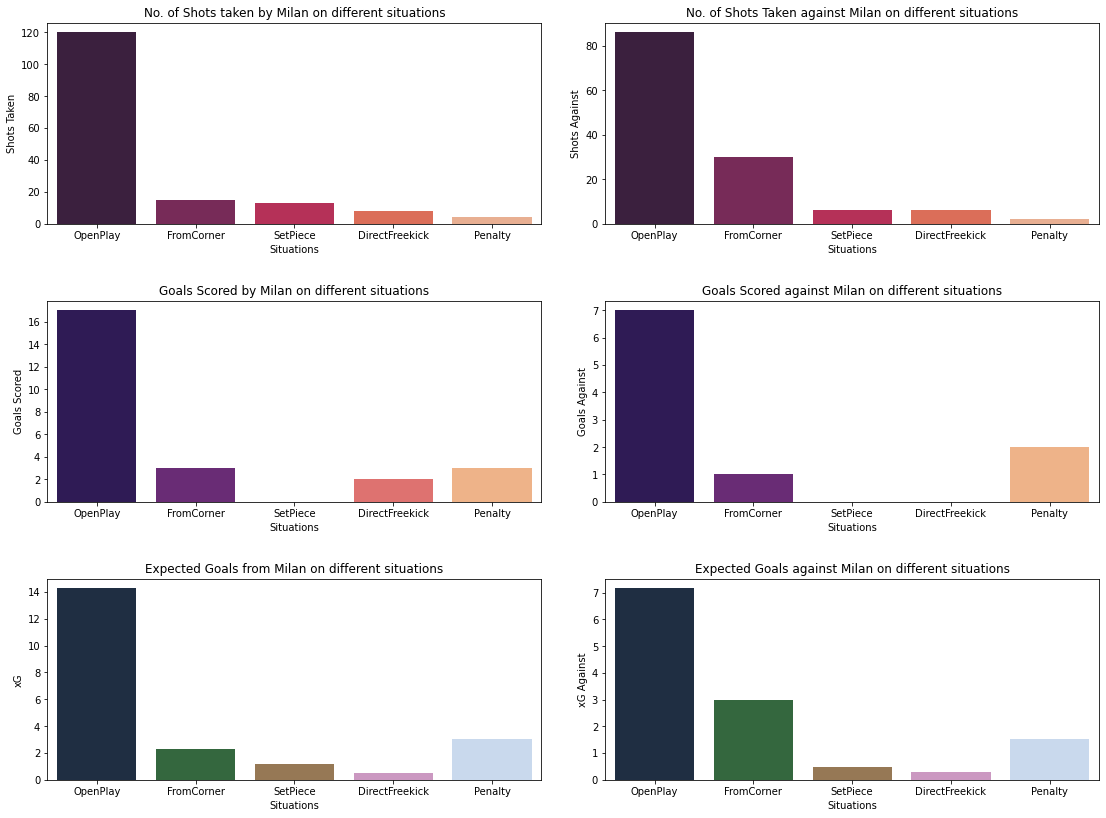

In [146]:
plt.figure(figsize=(16,12))

plt.subplot(3, 2, 1)
sns.barplot(x=Situations_df['Situations'],y=Situations_df['Shots Taken'],data=Situations_df,palette='rocket')
plt.title('No. of Shots taken by Milan on different situations')

plt.subplot(3,2,2)
sns.barplot(x='Situations',y='Shots Against',data=Situations_df,palette='rocket')
plt.title('No. of Shots Taken against Milan on different situations')

plt.subplot(3,2,3)
sns.barplot(x='Situations',y='Goals Scored',data=Situations_df,palette='magma')
plt.title('Goals Scored by Milan on different situations')

plt.subplot(3,2,4)
sns.barplot(x='Situations',y='Goals Against',data=Situations_df,palette='magma')
plt.title('Goals Scored against Milan on different situations')

plt.subplot(3,2,5)
sns.barplot(x='Situations',y='xG',data=Situations_df,palette='cubehelix')
plt.title('Expected Goals from Milan on different situations')

plt.subplot(3,2,6)
sns.barplot(x='Situations',y='xG Against',data=Situations_df,palette='cubehelix')
plt.title('Expected Goals against Milan on different situations')


plt.tight_layout(3)

plt.savefig('Situations.png')
plt.show()



In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# How Milan is performing so much well

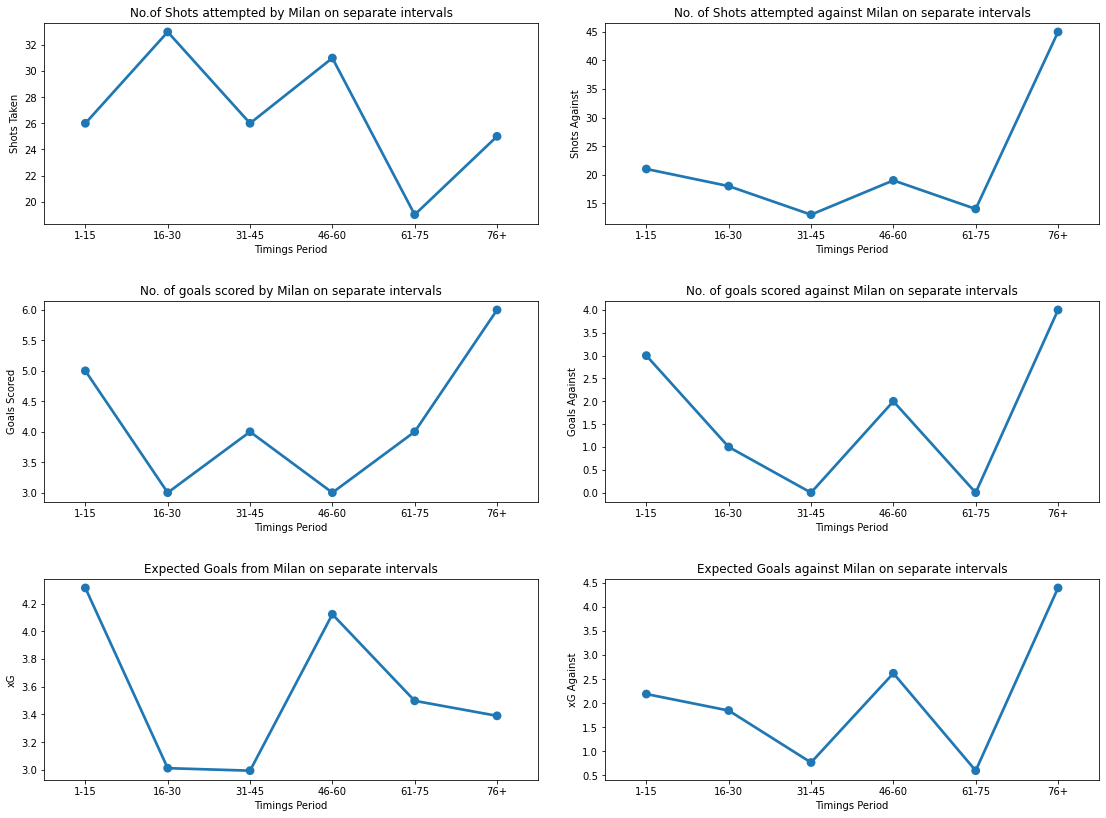

In [135]:
plt.figure(figsize=(16,12))

plt.subplot(3, 2, 1)
sns.pointplot(x='Timings Period',y='Shots Taken',data=Timings_df)
plt.title('No.of Shots attempted by Milan on separate intervals')

plt.subplot(3,2,3)
sns.pointplot(x=Timings_df['Timings Period'],y=Timings_df['Goals Scored'],data=Timings_df)
plt.title('No. of goals scored by Milan on separate intervals')

plt.subplot(3,2,5)
sns.pointplot(x='Timings Period',y='xG',data=Timings_df)
plt.title('Expected Goals from Milan on separate intervals')

plt.subplot(3,2,2)
sns.pointplot(x='Timings Period',y='Shots Against',data=Timings_df)
plt.title('No. of Shots attempted against Milan on separate intervals')

plt.subplot(3,2,4)
sns.pointplot(x='Timings Period',y='Goals Against',data=Timings_df)
plt.title('No. of goals scored against Milan on separate intervals')

plt.subplot(3,2,6)
sns.pointplot(x='Timings Period',y='xG Against',data=Timings_df)
plt.title('Expected Goals against Milan on separate intervals')

plt.tight_layout(3)
plt.savefig('Time Period.png')